# Cafe Wall Illusion
----

![](cafe-wall.gif)

Inspired from https://michaelbach.de/ot/ang-cafewall/index.html

## Setup & read checkerboard image

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import imageio
import numpy as np

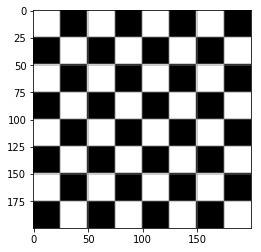

In [2]:
# read the default checkerboard image from imageio library
im = imageio.imread('imageio:checkerboard.png')
plt.imshow(im, cmap=plt.cm.gray)

## Create the illusion

The image contains 8x8 checkerboard with the size of each checker is 25x25. So we want to create an animated gif that shifts each horizontal checkers to the left and to the right alternatively.

In [3]:
# the GIF animation: 50 frames
nframes = 49

# the width of each checker
width = int(im.shape[0]/8)

Generate frames

In [4]:
# initial output image
im_out = np.zeros((nframes,) + im.shape, dtype=np.uint8)

# create frame
for j in np.arange(nframes):
    
    # iterate for each checker vertically
    for i in np.arange(8):
        i0 = i*width
        
        # alternate left & right
        if i%2==0:
            s = -j
        else:
            s = j
        
        # new frame
        im_out[j, i0:(i0+(width-1)),:] = np.roll(im[i0:(i0+(width-1)),:], s)

Check the output

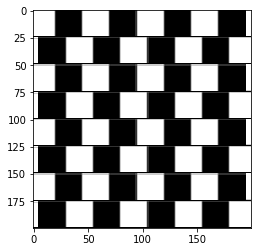

In [5]:
plt.imshow(im_out[5,:,:], cmap=plt.cm.gray)

Save the output image

In [6]:
imageio.mimwrite('cafe-wall.gif', im_out, format='gif', loop=0, fps=5)